In [1]:
# Loading Packages
library(tidyverse)
library(easystats)

library(arrow) # For reading .parquet files, which are much smaller
library(data.table)
library(dtplyr)

library(ggplot2)
library(ggthemes)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# Attaching packages: easystats 0.7.5
✔ bayestestR  0.17.0   ✔ correlation 0.8.8 
✔ datawizard  1.3.0    ✔ effectsize  1.0.1 
✔ insight     1.4.4    ✔ modelbased  0.13.1
✔ performance 0.15.3   ✔ parameters  0.28.3
✔ report      0.6.2    ✔ see         0.12.0



Attaching package: 'arrow'


The following object is masked from 'package:lubridate':

    duration


The following object is masked from 'package:utils':

    timestamp



Attaching package: 'data.table'


The foll

In [133]:
context <- function(dt, target_id, num=3) {

    u_ids <- unique(dt$Sentence_ID)
    

    target_pos <- match(target_id, u_ids)
    
    if (is.na(target_pos)) return(NULL)
    

    start_idx <- max(1, target_pos - num)
    end_idx   <- target_pos - 1
    
    prev_ids <- if (target_pos > 1) u_ids[start_idx:end_idx] else integer(0)
    
    dt_context <- dt[.(prev_ids), on = "Sentence_ID", mult = "first"]
    dt_context[, Phrase_Token := ""]
    dt_context[, Phrase_Surprisal := NA]
    
    dt_target <- dt[Sentence_ID == target_id]
    
    result <- rbind(dt_context, dt_target)

    # result <- result %>% select(-grp_idx)

    as_tibble(result)
    }

    context_full <- function(dt, target_id, num=3) {
    dt[, grp_idx := rleid(Sentence_ID)]
    target_grp <- dt[Sentence_ID == target_id, grp_idx[1]]
    result <- dt[grp_idx >= (target_grp - num) & grp_idx <= target_grp]
    result <- result %>% select(-grp_idx)
    as_tibble(result)
}

In [2]:
df_sent <- open_dataset("Data/Filtered Sentences.parquet") %>% collect()
df_nps <- open_dataset("Data/Head Nouns.parquet") %>% collect()


In [ ]:
 df_full <- open_dataset("Data/Full Data.parquet") %>% 
    select(Sentence_Text, Phrase_Token, Phrase_Surprisal, Sentence_ID) %>% 
    collect() %>% 
    setDT()

In [4]:
# Global font metrics for ggPlot: 
    plotFont <- function(fontBase) { # Easy way to adjust font size for plots
        theme( # Add as a final ggplot object (no parentheses)
        plot.title = element_text(size = 14*fontBase),      # Title font size
        axis.title.x = element_text(size = 12*fontBase),    # X-axis title font size
        axis.title.y = element_text(size = 12*fontBase),    # Y-axis title font size
        axis.text.x = element_text(size = 10*fontBase),     # X-axis tick labels font size
        axis.text.y = element_text(size = 10*fontBase),     # Y-axis tick labels font size
        legend.text = element_text(size = 10*fontBase),     # Legend text size
        legend.title = element_text(size = 10*fontBase),    # Legend title size
        strip.text = element_text(size = 10*fontBase)
        )
    }

    custom_theme <-  theme(
                            plot.background = element_rect(fill = "white", color = NA),
                            panel.background = element_rect(fill = "white", color = NA),
                            legend.background = element_rect(fill = "white", color = NA),

                            axis.line = element_line(color = "black", linewidth = 0.75), # <--- The key fix
                            axis.ticks = element_line(color = "black"),
                            panel.grid.major = element_line(color = "grey85"),
                            
                            legend.position = "bottom", 
                            legend.direction = "horizontal",
                            legend.title = element_blank(), # Clean look (optional)

                            plot.margin = margin(5,5,5,5, "mm")

                            
                            ) 

# For httpgd plot view in VS Code
options(repr.plot.width = 12, repr.plot.height = 8)

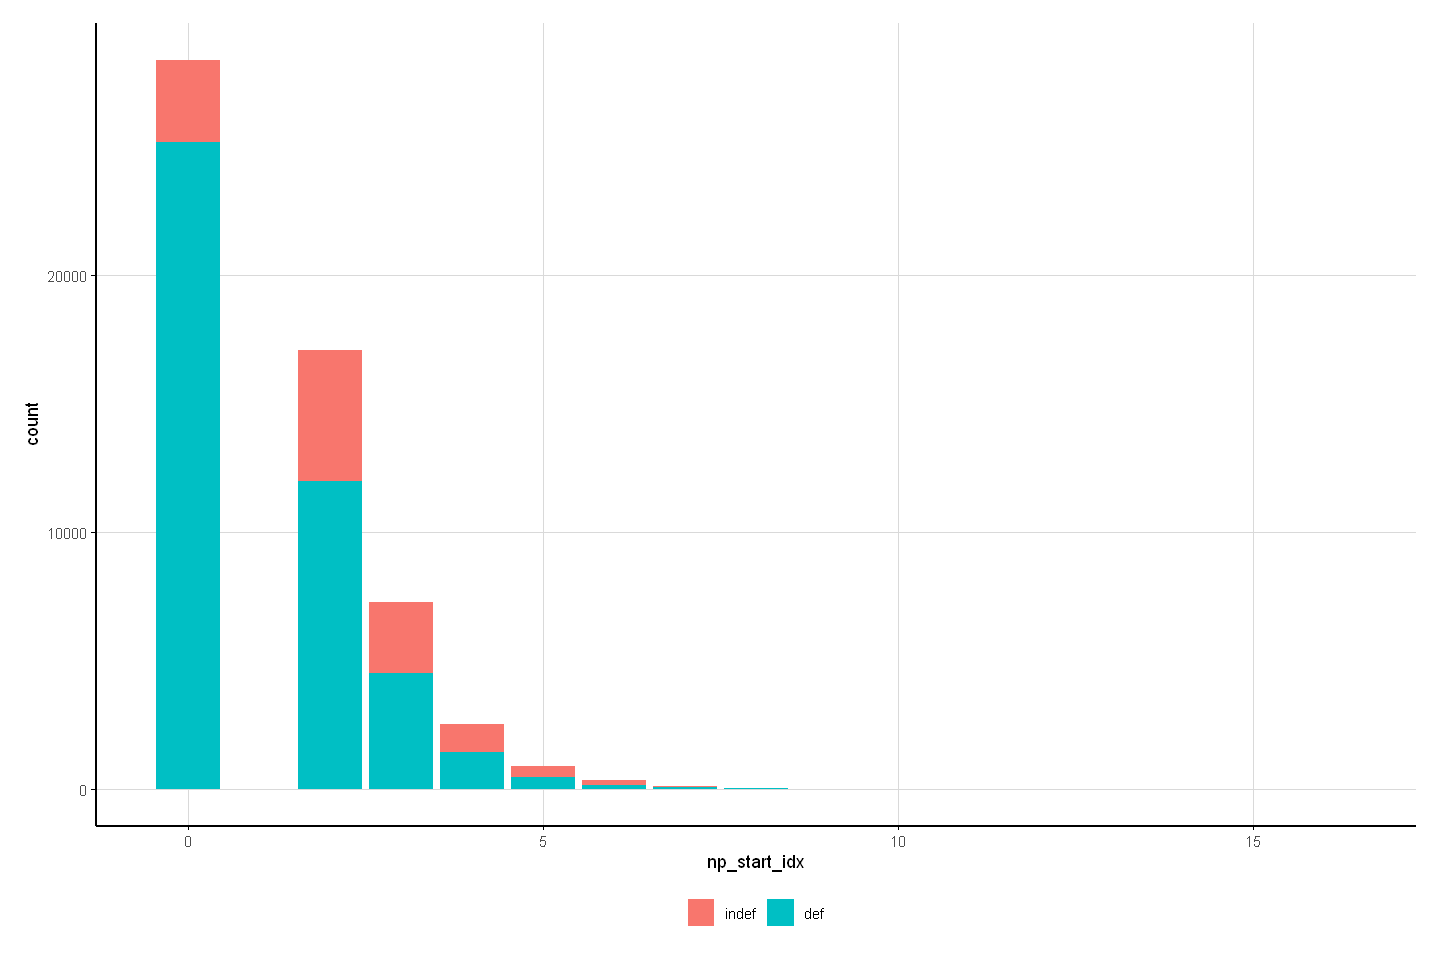

In [5]:
ggplot(df_nps, aes(x = np_start_idx, fill = definiteness)) + 
    geom_bar() + 
    custom_theme

In [10]:
df_nps %>% 
    count(definiteness, np_start_idx) %>% 
    group_by(np_start_idx) %>%
    mutate(prop = n/sum(n)) %>% 
    as_tibble()

definiteness,np_start_idx,n,prop
<fct>,<dbl>,<int>,<dbl>
indef,0,3223,0.1134819
indef,2,5116,0.2989191
indef,3,2760,0.3783932
indef,4,1108,0.4369085
indef,5,430,0.4751381
indef,6,178,0.5056818
indef,7,59,0.4573643
indef,8,17,0.3863636
indef,9,6,0.4615385


In [163]:
context(df_full, "AD1_0794")

Sentence_Text,Phrase_Token,Phrase_Surprisal,Sentence_ID
<chr>,<chr>,<dbl>,<chr>
"‘ There , ’ Dorothea said , ‘ there , ’ and poured the tea .",,NA,AD1_0791
"‘ I have never let myself go like that , ’ Alida said , ‘ never .",,NA,AD1_0792
It proves to what a point I am brought . ’,,NA,AD1_0793
Dorothea reassured her .,Dorothea,0.6249965,AD1_0794
Dorothea reassured her .,reassured,5.1876678,AD1_0794
Dorothea reassured her .,her,0.1723633,AD1_0794
Dorothea reassured her .,.,1.6347656,AD1_0794


In [162]:
df_nps %>% 
    filter() %>% 
    select(Sentence_Text, Phrase_Token, argPos, surprisal, Sentence_ID) %>%
    group_by(Sentence_ID)%>%
    mutate(max_surprisal = max(surprisal)) %>% 
    ungroup() %>% 
    arrange(max_surprisal)%>%
    head(20)

Sentence_Text,Phrase_Token,argPos,surprisal,Sentence_ID,max_surprisal
<chr>,<chr>,<fct>,<dbl>,<chr>,<dbl>
A Brownie always tells the truth .,A Brownie,sbj,0.32424784,G24_0268,0.3242478
A Brownie always tells the truth .,the truth,obj,0.07298279,G24_0268,0.3242478
Tertiary alkanols have three alkyl groups .,Tertiary alkanols,sbj,0.32697952,HSB_0669,0.3269795
Tertiary alkanols have three alkyl groups .,three alkyl groups,obj,0.09336146,HSB_0669,0.3269795
Preobrazhensky argued that :,Preobrazhensky,sbj,0.49144783,BMA_1265,0.4914478
Preobrazhensky argued that :,that,obj,0.17614746,BMA_1265,0.4914478
Haavikko shook his head .,Haavikko,sbj,0.52361721,G04_2321,0.5236172
Haavikko shook his head .,his head,obj,0.05979919,G04_2321,0.5236172
who fears the Lord .,who,sbj,0.57226562,ARG_0069,0.5722656


In [151]:
context(df_full, "J2U_0641", 3)

Sentence_Text,Phrase_Token,Phrase_Surprisal,Sentence_ID
<chr>,<chr>,<dbl>,<chr>
Aluminium recycling in the UK rose to 9.5 last year .,,NA,J2U_0638
"The number of UK recycling centres has risen from 24 in 1988 to 320 , whilst 163 local authorities registered for aluminium can recycling programmes .",,NA,J2U_0639
Financial Times 8 March,,NA,J2U_0640
Robot eats plastic packaging,Robot,20.343750,J2U_0641
Robot eats plastic packaging,eats,9.546875,J2U_0641
Robot eats plastic packaging,plastic packaging,3.798828,J2U_0641
Robot eats plastic packaging,plastic packaging,3.798828,J2U_0641


Sentence_Text,Phrase_Token,Phrase_Surprisal,Sentence_ID
<chr>,<chr>,<dbl>,<chr>
‘ And so you try to make it shorter . ’,,NA,FNT_4186
She looked at him for a moment and burst out laughing .,,NA,FNT_4187
‘ Are you offering that as an interpretation ? ’,,NA,FNT_4188
Jacob shook his head sadly .,Jacob,9.21875000,FNT_4189
Jacob shook his head sadly .,shook,3.44335938,FNT_4189
Jacob shook his head sadly .,his head,0.01050377,FNT_4189
Jacob shook his head sadly .,his head,0.01050377,FNT_4189
Jacob shook his head sadly .,sadly,4.96093750,FNT_4189
Jacob shook his head sadly .,.,0.51953125,FNT_4189


In [68]:
# Pulls the preceding sentences from the full dataset to view context window

df_full[, grp_idx := rleid(Sentence_ID)]
target_grp <- df_full[Sentence_ID == "EF4_0684", grp_idx[1]]
result <- df_full[grp_idx >= (target_grp - 3) & grp_idx <= target_grp]

as_tibble(result)

Sentence_Text,Phrase_Token,Phrase_Surprisal,Sentence_ID,grp_idx
<chr>,<chr>,<dbl>,<chr>,<int>
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",And,3.6738281,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",since,5.0000000,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",that assumption,2.2856445,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",that assumption,2.2856445,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",is,0.4821777,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",implicit,6.7304688,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",in,0.2346191,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",the Webbs ' criticism,3.7994385,EF4_0681,2178987
"And since that assumption is implicit in the Webbs ' criticism of Owen , it can not be understood too clearly that on their argument there can be no place for industrial co-operatives , properly so-called : no place , because the ownership , whether individual or collective , of an industrial co-operative rests in the people working in it .",the Webbs ' criticism,3.7994385,EF4_0681,2178987
